In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import csv
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn import linear_model
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from operator import itemgetter
from itertools import groupby

from unsupervised_methods import *
from evaluation import *


In [2]:
datafile = '/data/project/general/aerosolretriev/Jungfraujoch_data/data/aerosol_data.h5'


In [3]:
datasets, df_dates, SDE_events_start, SDE_events_end, df_SDE = read_data(datafile)

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['tot_V'] = df1[df1.columns[173:-1]].sum(axis =1) / (324-173)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['tot_S'] = df1[df1.columns[23:173]].sum(axis =1) / (173-23)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:206: SettingWithCopyWarning: 
A value is trying to be set

In [4]:
for dataset in datasets:
    print('***************')
    print(dataset.columns)

***************
Index(['N_N11', 'BsB_S12', 'BsG_S12', 'BsR_S12', 'BbsB_S12', 'BbsG_S12',
       'BbsR_S12', 'BaCorr2_A13', 'BaCorr3_A13', 'BaCorr4_A13',
       ...
       'V_D14_864696', 'V_D15_973718', 'V_D17_165483', 'V_D18_446161',
       'V_D19_822390', 'V_D21_301296', 'V_D22_890539', 'V_D24_598352',
       'V_D26_433582', 'AE_neg'],
      dtype='object', length=325)
***************
Index(['N_N11', 'BsB_S12', 'BsG_S12', 'BsR_S12', 'BbsB_S12', 'BbsG_S12',
       'BbsR_S12', 'BaCorr2_A13', 'BaCorr3_A13', 'BaCorr4_A13', 'BaCorr5_A13',
       'BaCorr6_A13', 'BaCorr7_A13', 'BaCorr1_A13', 'AAE', 'babs_450',
       'babs_550', 'babs_700', 'SSA_450', 'SSA_550', 'SSA_700', 'AE_SSA',
       'AE_neg'],
      dtype='object')
***************
Index(['D0_016849', 'D0_017466', 'D0_018106', 'D0_018769', 'D0_019456',
       'D0_020169', 'D0_020908', 'D0_021674', 'D0_022468', 'D0_023291',
       ...
       'D13_832670', 'D14_864696', 'D15_973718', 'D17_165483', 'D18_446161',
       'D19_822390', 'D21

In [5]:
res_OCSVM = []
df_OCSVM = []
for dataset in datasets:
    result1, dataframe1 = classification_results('OCSVM', dataset,df_dates, multivariate =True)
    res_OCSVM.append(result1)
    df_OCSVM.append(dataframe1)

Dataset0    Dataset1    Dataset2    Dataset3    Dataset4  \
#sde_truth     26.000000   26.000000   26.000000   26.000000   26.000000   
#nosde_truth   25.000000   25.000000   25.000000   25.000000   25.000000   
#sde_pred     217.000000  228.000000  211.000000  314.000000  215.000000   
#nosde_pred   218.000000  229.000000  212.000000  315.000000  216.000000   
TP             25.000000   27.000000   25.000000   26.000000   25.000000   
FN              1.000000   -1.000000    1.000000    0.000000    1.000000   
TN              1.000000    2.000000    1.000000    1.000000    1.000000   
FP             24.000000   23.000000   24.000000   24.000000   24.000000   
accuracy        0.509804    0.568627    0.509804    0.529412    0.509804   
precision       0.510204    0.540000    0.510204    0.520000    0.510204   
recall          0.961538    1.038462    0.961538    1.000000    0.961538   
specificity     0.040000    0.080000    0.040000    0.040000    0.040000   
F1              0.666667    0.710526    0.666667    0.684211    0.666667   

                Dataset5    Dataset6    Dataset7    Dataset8    Dataset9  
#sde_truth     26.000000   26.000000   26.000000   26.000000   26.000000  
#nosde_truth   25.000000   25.000000   25.000000   25.000000   25.000000  
#sde_pred     210.000000  233.000000  231.000000  224.000000  228.000000  
#nosde_pred   211.000000  234.000000  232.000000  225.000000  229.000000  
TP             25.000000   26.000000   27.000000   27.000000   27.000000  
FN              1.000000    0.000000   -1.000000   -1.000000   -1.000000  
TN              1.000000    2.000000    2.000000    1.000000    2.000000  
FP             24.000000   23.000000   23.000000   24.000000   23.000000  
accuracy        0.509804    0.549020    0.568627    0.549020    0.568627  
precision       0.510204    0.530612    0.540000    0.529412    0.540000  
recall          0.961538    1.000000    1.038462    1.038462    1.038462  
specificity     0.040000    0.080000    0.080000    0.040000    0.080000  
F1              0.666667    0.693333    0.710526    0.701299    0.710526

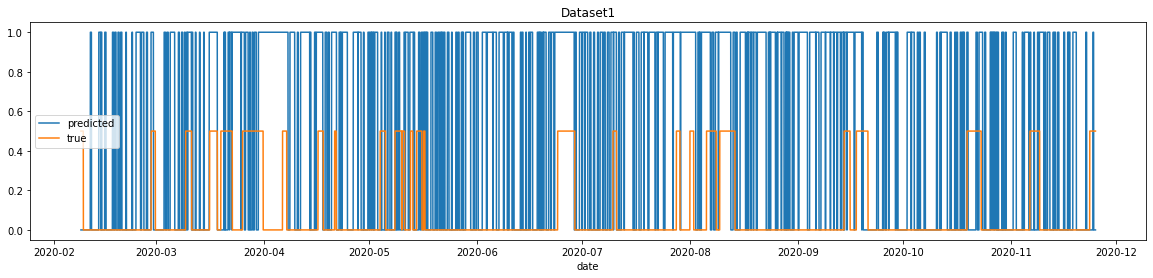

In [6]:
res_OCSVM_df = pd.DataFrame(index = res_OCSVM[0].index)
for i in range(len(res_OCSVM)):
    res_OCSVM_df['Dataset'+str(i)]= res_OCSVM[i]['all'].values
best_OCSVM = res_OCSVM_df.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0]

df_OCSVM_plot = df_OCSVM[int((best_OCSVM.name)[7:])]

plt.figure(figsize = (20,4))
plt.plot(df_OCSVM_plot.index, df_OCSVM_plot['sde_event_predicted'], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.xlabel('date')
plt.title(best_OCSVM.name)
plt.legend()
res_OCSVM_df




In [7]:
dataset

N_N11  BsB_S12  BsG_S12  BsR_S12  BbsB_S12  BbsG_S12  \
2020-02-08 14:00:00  516.0     1.74     1.20     0.78      0.55      0.10   
2020-02-08 15:00:00  465.0     1.66     0.99     0.44      0.29      0.19   
2020-02-08 16:00:00  401.0     2.08     1.80     1.83      0.11      0.06   
2020-02-08 17:00:00  411.0     1.18     0.77     0.57      0.48     -0.10   
2020-02-08 18:00:00  452.0     1.27     1.17     0.76      0.17      0.01   
...                    ...      ...      ...      ...       ...       ...   
2020-11-24 23:00:00  349.0     1.08     0.98     0.90      0.18      0.08   
2020-11-25 00:00:00  355.0     0.99     0.98     0.78      0.02      0.19   
2020-11-25 01:00:00  347.0     1.53     1.25     0.48      0.04     -0.09   
2020-11-25 02:00:00  312.0     1.26     0.97     0.55      0.18     -0.07   
2020-11-25 03:00:00  300.0     1.03     1.05     0.55      0.21      0.06   

                     BbsR_S12  BaCorr2_A13  BaCorr3_A13  BaCorr4_A13  ...  \
2020-02-08 14:00:00      0.07         0.28         0.25         0.21  ...   
2020-02-08 15:00:00      0.10         0.25         0.23         0.20  ...   
2020-02-08 16:00:00      0.46         0.28         0.24         0.19  ...   
2020-02-08 17:00:00      0.12         0.30         0.25         0.22  ...   
2020-02-08 18:00:00      0.14         0.40         0.35         0.31  ...   
...                       ...          ...          ...          ...  ...   
2020-11-24 23:00:00      0.31         0.11         0.09         0.08  ...   
2020-11-25 00:00:00      0.18         0.11         0.09         0.09  ...   
2020-11-25 01:00:00     -0.02         0.10         0.08         0.07  ...   
2020-11-25 02:00:00      0.02         0.10         0.09         0.08  ...   
2020-11-25 03:00:00      0.22         0.12         0.09         0.08  ...   

                     babs_450  babs_550  babs_700   SSA_450   SSA_550  \
2020-02-08 14:00:00  0.294905  0.233823  0.195768  0.855077  0.836923   
2020-02-08 15:00:00  0.264735  0.213623  0.185087  0.862457  0.822517   
2020-02-08 16:00:00  0.295912  0.223485  0.167029  0.875453  0.889554   
2020-02-08 17:00:00  0.318963  0.230996  0.138061  0.787211  0.769234   
2020-02-08 18:00:00  0.420958  0.327688  0.270637  0.751054  0.781204   
...                       ...       ...       ...       ...       ...   
2020-11-24 23:00:00  0.114461  0.085501  0.066334  0.904173  0.919755   
2020-11-25 00:00:00  0.114824  0.085153  0.075487  0.896071  0.920055   
2020-11-25 01:00:00  0.104261  0.075808  0.047255  0.936203  0.942822   
2020-11-25 02:00:00  0.104032  0.085526  0.056875  0.923732  0.918973   
2020-11-25 03:00:00  0.125150  0.085252  0.056683  0.891659  0.924905   

                      SSA_700    AE_SSA  AE_neg  V_ratio500  S_ratio500  
2020-02-08 14:00:00  0.799370  0.153732     0.0    2.626857    0.002539  
2020-02-08 15:00:00  0.703901  0.465966     0.0    2.595229    0.001604  
2020-02-08 16:00:00  0.916361 -0.104019     0.0    2.649089    0.004199  
2020-02-08 17:00:00  0.805015 -0.055205     0.0    2.599113    0.001149  
2020-02-08 18:00:00  0.737408  0.048076     0.0    2.422725    0.001505  
...                       ...       ...     ...         ...         ...  
2020-11-24 23:00:00  0.931355 -0.066538     0.0    2.253933    0.001631  
2020-11-25 00:00:00  0.911762 -0.036735     0.0    2.281418    0.001426  
2020-11-25 01:00:00  0.910376  0.066038     0.0    0.952375    0.001561  
2020-11-25 02:00:00  0.906282  0.043645     0.0    1.516470    0.001674  
2020-11-25 03:00:00  0.906568 -0.033522     0.0    0.943826    0.001606  

[6974 rows x 25 columns]

In [8]:
result1, dataframe1 = classification_results('LOF', dataset,df_dates, multivariate =True)


In [9]:
res_LOF = []
df_LOF = []
for dataset in datasets:
    result1, dataframe1 = classification_results('LOF', dataset,df_dates, multivariate =True)
    res_LOF.append(result1)
    df_LOF.append(dataframe1)

Dataset0    Dataset1   Dataset2   Dataset3    Dataset4  \
#sde_truth     26.000000   26.000000  26.000000  26.000000   26.000000   
#nosde_truth   25.000000   25.000000  25.000000  25.000000   25.000000   
#sde_pred     109.000000  100.000000  90.000000  48.000000  111.000000   
#nosde_pred   110.000000  101.000000  91.000000  49.000000  112.000000   
TP             18.000000   22.000000  18.000000   6.000000   18.000000   
FN              8.000000    4.000000   8.000000  20.000000    8.000000   
TN              8.000000   10.000000   8.000000  10.000000    7.000000   
FP             17.000000   15.000000  17.000000  15.000000   18.000000   
accuracy        0.509804    0.627451   0.509804   0.313725    0.490196   
precision       0.514286    0.594595   0.514286   0.285714    0.500000   
recall          0.692308    0.846154   0.692308   0.230769    0.692308   
specificity     0.320000    0.400000   0.320000   0.400000    0.280000   
F1              0.590164    0.698413   0.590164   0.255319    0.580645   

                Dataset5   Dataset6   Dataset7   Dataset8   Dataset9  
#sde_truth     26.000000  26.000000  26.000000  26.000000  26.000000  
#nosde_truth   25.000000  25.000000  25.000000  25.000000  25.000000  
#sde_pred     104.000000  61.000000  95.000000  87.000000  92.000000  
#nosde_pred   105.000000  62.000000  96.000000  88.000000  93.000000  
TP             21.000000  11.000000  20.000000  21.000000  21.000000  
FN              5.000000  15.000000   6.000000   5.000000   5.000000  
TN              7.000000  11.000000   7.000000   6.000000   9.000000  
FP             18.000000  14.000000  18.000000  19.000000  16.000000  
accuracy        0.549020   0.431373   0.529412   0.529412   0.588235  
precision       0.538462   0.440000   0.526316   0.525000   0.567568  
recall          0.807692   0.423077   0.769231   0.807692   0.807692  
specificity     0.280000   0.440000   0.280000   0.240000   0.360000  
F1              0.646154   0.431373   0.625000   0.636364   0.666667

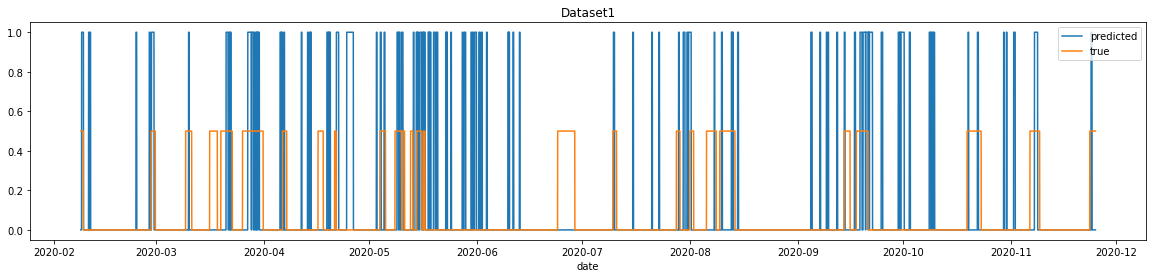

In [10]:
res_LOF_df = pd.DataFrame(index = res_LOF[0].index)
for i in range(len(res_LOF)):
    res_LOF_df['Dataset'+str(i)]= res_LOF[i]['all'].values
best_LOF= res_LOF_df.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0]

df_LOF_plot = df_LOF[int((best_LOF.name)[7:])]

plt.figure(figsize = (20,4))
plt.plot(df_LOF_plot.index, df_LOF_plot['sde_event_predicted'], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.xlabel('date')
plt.title(best_LOF.name)
plt.legend()
res_LOF_df




In [11]:
res_IF = []
df_IF = []
for dataset in datasets:
    result1, dataframe1 = classification_results('isolation_forest', dataset,df_dates, multivariate =True)
    res_IF.append(result1)
    df_IF.append(dataframe1)

Dataset0    Dataset1    Dataset2    Dataset3    Dataset4  \
#sde_truth     26.000000   26.000000   26.000000   26.000000   26.000000   
#nosde_truth   25.000000   25.000000   25.000000   25.000000   25.000000   
#sde_pred     137.000000  142.000000  143.000000  140.000000  135.000000   
#nosde_pred   136.000000  141.000000  142.000000  139.000000  134.000000   
TP             25.000000   26.000000   26.000000   25.000000   25.000000   
FN              1.000000    0.000000    0.000000    1.000000    1.000000   
TN              0.000000    0.000000    0.000000    0.000000    0.000000   
FP             25.000000   25.000000   25.000000   25.000000   25.000000   
accuracy        0.490196    0.509804    0.509804    0.490196    0.490196   
precision       0.500000    0.509804    0.509804    0.500000    0.500000   
recall          0.961538    1.000000    1.000000    0.961538    0.961538   
specificity     0.000000    0.000000    0.000000    0.000000    0.000000   
F1              0.657895    0.675325    0.675325    0.657895    0.657895   

                Dataset5    Dataset6    Dataset7    Dataset8    Dataset9  
#sde_truth     26.000000   26.000000   26.000000   26.000000   26.000000  
#nosde_truth   25.000000   25.000000   25.000000   25.000000   25.000000  
#sde_pred     134.000000  134.000000  135.000000  123.000000  125.000000  
#nosde_pred   133.000000  133.000000  134.000000  122.000000  124.000000  
TP             25.000000   25.000000   26.000000   26.000000   25.000000  
FN              1.000000    1.000000    0.000000    0.000000    1.000000  
TN              0.000000    0.000000    0.000000    0.000000    1.000000  
FP             25.000000   25.000000   25.000000   25.000000   24.000000  
accuracy        0.490196    0.490196    0.509804    0.509804    0.509804  
precision       0.500000    0.500000    0.509804    0.509804    0.510204  
recall          0.961538    0.961538    1.000000    1.000000    0.961538  
specificity     0.000000    0.000000    0.000000    0.000000    0.040000  
F1              0.657895    0.657895    0.675325    0.675325    0.666667

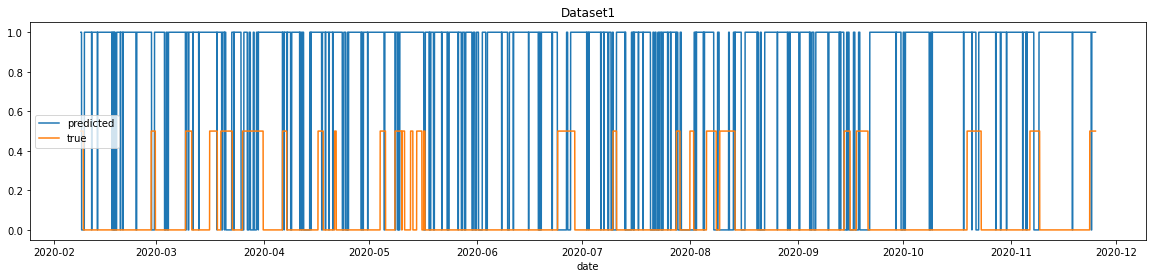

In [12]:
res_IF_df = pd.DataFrame(index = res_IF[0].index)
for i in range(len(res_IF)):
    res_IF_df['Dataset'+str(i)]= res_IF[i]['all'].values
best_IF = res_IF_df.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0]

df_IF_plot = df_IF[int((best_IF.name)[7:])]

plt.figure(figsize = (20,4))
plt.plot(df_IF_plot.index, df_IF_plot['sde_event_predicted'], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.xlabel('date')
plt.title(best_IF.name)
plt.legend()
res_IF_df



In [13]:
res_kmeans = []
df_kmeans = []
for dataset in datasets:
    result1, dataframe1 = classification_results('kmeans', dataset,df_dates, multivariate =True )
    res_kmeans.append(result1)
    df_kmeans.append(dataframe1)  

Dataset0   Dataset1   Dataset2   Dataset3   Dataset4  \
#sde_truth    26.000000  26.000000  26.000000  26.000000  26.000000   
#nosde_truth  25.000000  25.000000  25.000000  25.000000  25.000000   
#sde_pred     93.000000  91.000000  85.000000  88.000000  92.000000   
#nosde_pred   94.000000  92.000000  86.000000  89.000000  93.000000   
TP            17.000000  17.000000  16.000000   6.000000  16.000000   
FN             9.000000   9.000000  10.000000  20.000000  10.000000   
TN             8.000000   6.000000   8.000000   9.000000   8.000000   
FP            17.000000  19.000000  17.000000  16.000000  17.000000   
accuracy       0.490196   0.450980   0.470588   0.294118   0.470588   
precision      0.500000   0.472222   0.484848   0.272727   0.484848   
recall         0.653846   0.653846   0.615385   0.230769   0.615385   
specificity    0.320000   0.240000   0.320000   0.360000   0.320000   
F1             0.566667   0.548387   0.542373   0.250000   0.542373   

               Dataset5   Dataset6   Dataset7   Dataset8   Dataset9  
#sde_truth    26.000000  26.000000  26.000000  26.000000  26.000000  
#nosde_truth  25.000000  25.000000  25.000000  25.000000  25.000000  
#sde_pred     93.000000  79.000000  94.000000  96.000000  91.000000  
#nosde_pred   94.000000  80.000000  95.000000  97.000000  92.000000  
TP            17.000000   5.000000  17.000000  17.000000  17.000000  
FN             9.000000  21.000000   9.000000   9.000000   9.000000  
TN             8.000000  14.000000   6.000000   7.000000   6.000000  
FP            17.000000  11.000000  19.000000  18.000000  19.000000  
accuracy       0.490196   0.372549   0.450980   0.470588   0.450980  
precision      0.500000   0.312500   0.472222   0.485714   0.472222  
recall         0.653846   0.192308   0.653846   0.653846   0.653846  
specificity    0.320000   0.560000   0.240000   0.280000   0.240000  
F1             0.566667   0.238095   0.548387   0.557377   0.548387

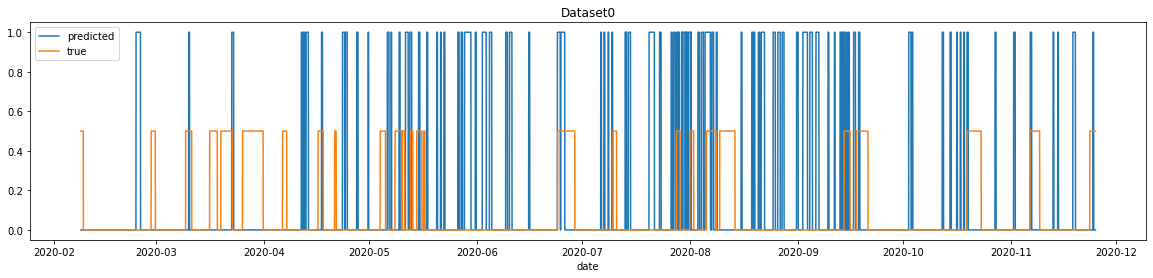

In [14]:
res_kmeans_df = pd.DataFrame(index = res_kmeans[0].index)
for i in range(len(res_kmeans)):
    res_kmeans_df['Dataset'+str(i)]= res_kmeans[i]['all'].values
best_kmeans = res_kmeans_df.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0]

df_kmeans_plot = df_kmeans[int((best_kmeans.name)[7:])]

plt.figure(figsize = (20,4))
plt.plot(df_kmeans_plot.index, df_kmeans_plot['sde_event_predicted'], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.xlabel('date')
plt.title(best_kmeans.name)
plt.legend()
res_kmeans_df


In [15]:
res_OCSVM_SGD = []
df_OCSVM_SGD = []
for dataset in datasets:
    result1, dataframe1 = classification_results('OCSVM_SGD', dataset,df_dates, multivariate =True)
    res_OCSVM_SGD.append(result1)
    df_OCSVM_SGD.append(dataframe1)

Dataset0   Dataset1   Dataset2    Dataset3   Dataset4  \
#sde_truth    26.000000  26.000000  26.000000   26.000000  26.000000   
#nosde_truth  25.000000  25.000000  25.000000   25.000000  25.000000   
#sde_pred     53.000000  68.000000  50.000000  253.000000  52.000000   
#nosde_pred   54.000000  69.000000  51.000000  253.000000  53.000000   
TP             9.000000  15.000000  12.000000   23.000000  11.000000   
FN            17.000000  11.000000  14.000000    3.000000  15.000000   
TN            14.000000   8.000000  12.000000    2.000000  12.000000   
FP            11.000000  17.000000  13.000000   23.000000  13.000000   
accuracy       0.450980   0.450980   0.470588    0.490196   0.450980   
precision      0.450000   0.468750   0.480000    0.500000   0.458333   
recall         0.346154   0.576923   0.461538    0.884615   0.423077   
specificity    0.560000   0.320000   0.480000    0.080000   0.480000   
F1             0.391304   0.517241   0.470588    0.638889   0.440000   

               Dataset5   Dataset6   Dataset7   Dataset8   Dataset9  
#sde_truth    26.000000  26.000000  26.000000  26.000000  26.000000  
#nosde_truth  25.000000  25.000000  25.000000  25.000000  25.000000  
#sde_pred     49.000000  76.000000  73.000000  72.000000  68.000000  
#nosde_pred   50.000000  77.000000  74.000000  73.000000  69.000000  
TP            10.000000  15.000000  15.000000  15.000000  15.000000  
FN            16.000000  11.000000  11.000000  11.000000  11.000000  
TN            14.000000   8.000000   8.000000   8.000000   8.000000  
FP            11.000000  17.000000  17.000000  17.000000  17.000000  
accuracy       0.470588   0.450980   0.450980   0.450980   0.450980  
precision      0.476190   0.468750   0.468750   0.468750   0.468750  
recall         0.384615   0.576923   0.576923   0.576923   0.576923  
specificity    0.560000   0.320000   0.320000   0.320000   0.320000  
F1             0.425532   0.517241   0.517241   0.517241   0.517241

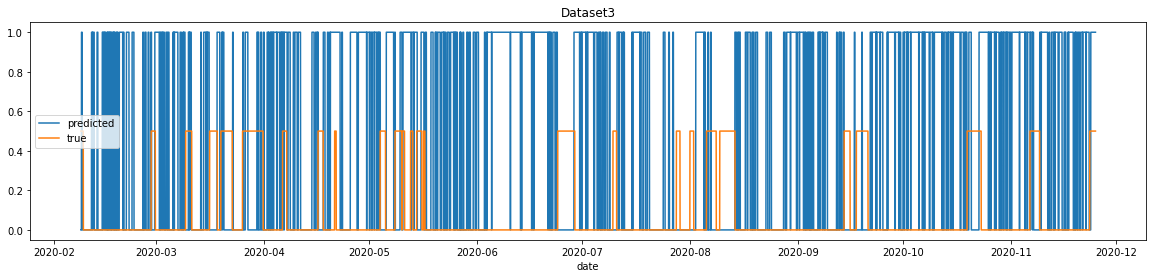

In [16]:
res_OCSVM_SGD_df = pd.DataFrame(index = res_OCSVM_SGD[0].index)
for i in range(len(res_OCSVM_SGD)):
    res_OCSVM_SGD_df['Dataset'+str(i)]= res_OCSVM_SGD[i]['all'].values
best_OCSVM_SGD= res_OCSVM_SGD_df.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0]

df_OCSVM_SGD_plot = df_OCSVM_SGD[int((best_OCSVM_SGD.name)[7:])]

plt.figure(figsize = (20,4))
plt.plot(df_OCSVM_SGD_plot.index, df_OCSVM_SGD_plot['sde_event_predicted'], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.xlabel('date')
plt.title(best_OCSVM_SGD.name)
plt.legend()
res_OCSVM_SGD_df
